In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/new_bdd_models.csv", index_col=0)
bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,...,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,dataset_name,git_branch
0,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.595940,0.045925,0.575977,0.035288,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.349243,0.515141,cingulate_HCP_half_1,Run_03_aymeric
1,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.600870,0.040834,0.578182,0.038861,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.376334,0.615989,cingulate_HCP_half_1,Run_03_aymeric
2,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.659754,0.048348,0.617584,0.042720,convnet,16,0.15,250,True,...,6,250,30,30,0.1,0.1,0.416473,0.440377,cingulate_HCP_half_1,Run_03_aymeric
3,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.605214,0.042651,0.588129,0.037000,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.392093,0.608668,cingulate_HCP_half_1,Run_03_aymeric
4,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.606865,0.044687,0.588305,0.037069,convnet,16,0.15,250,True,...,6,250,30,30,0.1,0.1,0.330082,0.690635,cingulate_HCP_half_1,Run_03_aymeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.651585,0.001231,0.622804,0.002003,pointnet,16,0.00,100,False,...,10,250,30,30,0.1,0.1,0.890107,0.724653,cingulate_HCP_half_1,pointnet
127,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.627033,0.018632,0.625161,0.012915,pointnet,16,0.10,100,False,...,10,250,30,30,0.1,0.1,1.952606,1.368340,cingulate_HCP_half_1,pointnet
128,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.486872,0.025558,0.577713,0.000000,pointnet,16,0.15,100,False,...,10,250,4,4,0.1,0.1,4.179968,3.784941,cingulate_HCP_half_1,pointnet
129,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.463362,0.009882,0.559331,0.002454,pointnet,16,0.05,100,False,...,10,250,4,4,0.1,0.1,3.744332,3.345133,cingulate_HCP_half_1,pointnet


In [21]:
nn_measured = bdd[bdd.model_path.str.contains("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders")]
nn_measured

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,...,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,dataset_name,git_branch
0,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.595940,0.045925,0.575977,0.035288,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.349243,0.515141,cingulate_HCP_half_1,Run_03_aymeric
1,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.600870,0.040834,0.578182,0.038861,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.376334,0.615989,cingulate_HCP_half_1,Run_03_aymeric
2,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.659754,0.048348,0.617584,0.042720,convnet,16,0.15,250,True,...,6,250,30,30,0.1,0.1,0.416473,0.440377,cingulate_HCP_half_1,Run_03_aymeric
3,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.605214,0.042651,0.588129,0.037000,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.392093,0.608668,cingulate_HCP_half_1,Run_03_aymeric
4,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.606865,0.044687,0.588305,0.037069,convnet,16,0.15,250,True,...,6,250,30,30,0.1,0.1,0.330082,0.690635,cingulate_HCP_half_1,Run_03_aymeric
5,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.581583,0.057815,0.562100,0.052206,convnet,16,0.15,100,True,...,6,250,4,4,0.1,0.1,4.480739,2.831487,cingulate_HCP_half_1,Run_03_aymeric
6,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.658169,0.039913,0.675953,0.025605,convnet,16,0.15,100,True,...,6,250,4,4,0.1,0.1,3.525009,3.058584,cingulate_HCP_half_1,Run_03_aymeric
7,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.624676,0.048144,0.630076,0.021029,convnet,16,0.15,100,True,...,6,250,4,4,0.1,0.1,3.251271,2.774460,cingulate_HCP_half_1,Run_03_aymeric
8,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.530707,0.044796,0.506229,0.049234,convnet,16,0.15,250,True,...,6,250,4,4,0.1,0.1,7.934582,6.433455,cingulate_HCP_half_1,Run_03_aymeric
9,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.571589,0.048066,0.518147,0.047136,convnet,16,0.15,100,True,...,6,250,4,4,0.1,0.1,8.128778,6.433416,cingulate_HCP_half_1,Run_03_aymeric


In [18]:
nn_dist = pd.read_csv("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/#performance_comparisons/nn/nne_ln.csv", index_col=0)
nn_dist

,convnet,densenet2
foldlabel_30,0.433729,0.596620
foldlabel_4,0.783451,0.731105
no_foldlabel_30,0.324525,0.422612
no_foldlabel_4,0.849684,0.750240


In [19]:
parameters = ['backbone_name','foldlabel','num_representation_features']

In [22]:
std_values = nn_measured.groupby(parameters).auc_std.mean()
print(std_values)


std_df = np.zeros((4,2))
std_df[:,0] = std_values['convnet'][::-1]
std_df[:,1] = std_values['densenet'][::-1]


std_df = pd.DataFrame(std_df, columns=nn_dist.columns, index=nn_dist.index)
std_df

backbone_name  foldlabel  num_representation_features
convnet        False      4                              0.041530
                          30                             0.044261
               True       4                              0.046475
                          30                             0.044489
densenet       False      4                              0.028280
                          30                             0.038345
               True       4                              0.031609
                          30                             0.049897
Name: auc_std, dtype: float64


,convnet,densenet2
foldlabel_30,0.044489,0.049897
foldlabel_4,0.046475,0.031609
no_foldlabel_30,0.044261,0.038345
no_foldlabel_4,0.041530,0.028280


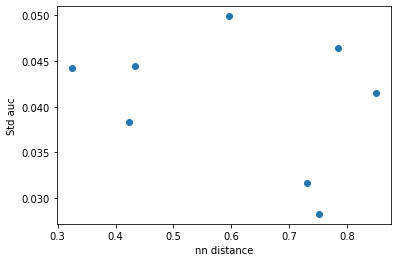

In [23]:
plt.scatter(nn_dist.values.flatten(), std_df.values.flatten())
plt.xlabel("nn distance")
plt.ylabel("Std auc")
plt.show()

## Pointnet

In [26]:
pointnets = bdd[bdd.backbone_name == 'pointnet']
repeat_pointnets = pointnets[pointnets.model_path.str.contains('file')]
repeat_pointnets

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,...,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,dataset_name,git_branch
87,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.670079,0.008259,0.642768,0.008339,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.190189,1.512488,cingulate_HCP_half_1,pointnet
88,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.667489,0.007258,0.639660,0.004682,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.381919,1.973476,cingulate_HCP_half_1,pointnet
89,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.653546,0.006033,0.635343,0.005359,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.521682,1.732653,cingulate_HCP_half_1,pointnet
90,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.669777,0.006462,0.680352,0.007750,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.477166,1.418302,cingulate_HCP_half_1,pointnet
91,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.678702,0.006920,0.668692,0.007873,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.336895,2.419318,cingulate_HCP_half_1,pointnet
92,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.666463,0.007006,0.656751,0.007846,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.495126,1.853137,cingulate_HCP_half_1,pointnet
93,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.625960,0.011787,0.616387,0.008938,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.294154,1.433163,cingulate_HCP_full,pointnet
94,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.647039,0.010680,0.628340,0.010476,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.117448,2.047104,cingulate_HCP_full,pointnet
95,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.661557,0.011752,0.650041,0.011841,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.257227,1.789311,cingulate_HCP_full,pointnet
96,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.654295,0.010130,0.642170,0.012270,pointnet,16,0.05,100,True,...,6,250,30,30,0.1,0.1,1.188070,1.545674,cingulate_HCP_full,pointnet


In [27]:
main_path = "/neurospin/dico/agaudin/Runs/04_pointnet/Output/pointnet"
folders = [folder for folder in os.listdir(main_path)
           if 'file' in folder]

nn_means = []
auc_stds = []

for folder in folders:
    auc_stds.append(pointnets[pointnets.model_path.str.contains(main_path+'/'+folder)].auc_std.mean())
    with open(main_path+'/'+folder+'/#nn/mean_nn.txt', 'r') as file:
        nne = file.readline()
        nn_means.append(float(nne))

In [29]:
for i in range(len(folders)):
    print(folders[i], nn_means[i])

file_fold_4_drop_rate=0.05_HCPfull 0.5946846447888086
file_fold_30_drop_rate=0.05_HCPfull 0.43847828037491465
file_fold_4_drop_rate=0.05 0.6933971041647385
file_no_30_drop_rate=0.05 0.44561359329634254
file_no_30 0.6433180418532796
file_fold_30_drop_rate=0.05 0.4395491986444514


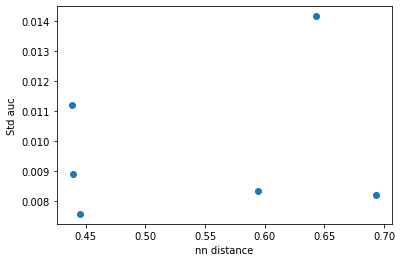

In [16]:
plt.scatter(nn_means, auc_stds)
plt.xlabel("nn distance")
plt.ylabel("Std auc")
plt.show()

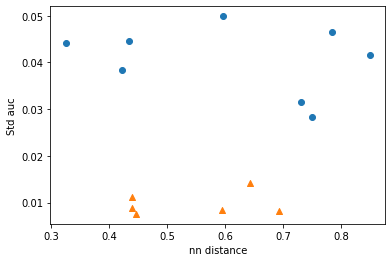

In [25]:
# porque no los dos?

plt.scatter(nn_dist.values.flatten(), std_df.values.flatten())
plt.scatter(nn_means, auc_stds, marker='^')
plt.xlabel("nn distance")
plt.ylabel("Std auc")
plt.show()